In [1]:
import numpy as np 
import pandas as pd 
import os
from time import time
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from matplotlib import rcParams
%matplotlib inline
le = preprocessing.LabelEncoder()
from numba import jit
import itertools
from seaborn import countplot,lineplot, barplot
from numba import jit
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import preprocessing
from scipy.stats import randint as sp_randint
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

import matplotlib.style as style 
style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')
import gc
gc.enable()

!ls ../input/
print ("Ready !")

X_test.csv  X_train.csv  sample_submission.csv	y_train.csv
Ready !


In [2]:
data = pd.read_csv('../input/X_train.csv')
tr = pd.read_csv('../input/X_train.csv')
sub = pd.read_csv('../input/sample_submission.csv')
test = pd.read_csv('../input/X_test.csv')
target = pd.read_csv('../input/y_train.csv')
print ("Data is ready !!")

Data is ready !!



**DATA**

X_[train/test].csv - the input data, covering 10 sensor channels and 128 measurements per time series plus three ID columns:

row_id: The ID for this row.

series_id: ID number for the measurement series. Foreign key to y_train/sample_submission.

measurement_number: Measurement number within the series.

The orientation channels encode the current angles how the robot is oriented as a quaternion (see Wikipedia). Angular velocity describes the angle and speed of motion, and linear acceleration components describe how the speed is changing at different times. The 10 sensor channels are:

orientation_X

orientation_Y

orientation_Z

orientation_W

angular_velocity_X

angular_velocity_Y

angular_velocity_Z

linear_acceleration_X

linear_acceleration_Y

linear_acceleration_Z
y_train.csv - the surfaces for training set.

series_id: ID number for the measurement series.

group_id: ID number for all of the measurements taken in a recording session. Provided for the training set only, to enable more cross validation strategies.

surface: the target for this competition.

sample_submission.csv - a sample submission file in the correct format.

In [3]:
data[0:130]

,row_id,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
0,0_0,0,0,-0.75853,-0.63435,-0.104880,-0.10597,0.107650,0.017561,0.000767,-0.748570,2.103000,-9.7532
1,0_1,0,1,-0.75853,-0.63434,-0.104900,-0.10600,0.067851,0.029939,0.003385,0.339950,1.506400,-9.4128
2,0_2,0,2,-0.75853,-0.63435,-0.104920,-0.10597,0.007275,0.028934,-0.005978,-0.264290,1.592200,-8.7267
3,0_3,0,3,-0.75852,-0.63436,-0.104950,-0.10597,-0.013053,0.019448,-0.008974,0.426840,1.099300,-10.0960
4,0_4,0,4,-0.75852,-0.63435,-0.104950,-0.10596,0.005135,0.007652,0.005245,-0.509690,1.468900,-10.4410
5,0_5,0,5,-0.75853,-0.63439,-0.104830,-0.10580,0.059664,0.013043,-0.013231,-0.447450,0.992810,-10.4020
6,0_6,0,6,-0.75853,-0.63441,-0.104810,-0.10569,0.082140,0.044356,-0.002696,-0.141630,0.734970,-9.4296
7,0_7,0,7,-0.75852,-0.63444,-0.104800,-0.10561,0.056218,0.038162,-0.022931,-0.121600,0.075417,-8.6088
8,0_8,0,8,-0.75851,-0.63445,-0.104850,-0.10559,-0.012846,0.039004,-0.007831,1.600000,0.816110,-7.6426
9,0_9,0,9,-0.75851,-0.63443,-0.104890,-0.10567,-0.090082,0.027299,-0.009970,0.474960,0.909600,-8.8120


In [4]:
test.head()

,row_id,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
0,0_0,0,0,-0.025773,-0.98864,-0.14801,0.003350,-0.006524,-0.001071,-0.027390,0.10043,4.2061,-5.5439
1,0_1,0,1,-0.025683,-0.98862,-0.14816,0.003439,-0.113960,0.083987,-0.060590,-0.70889,3.9905,-8.0273
2,0_2,0,2,-0.025617,-0.98861,-0.14826,0.003571,-0.080518,0.114860,-0.037177,1.45710,2.2828,-11.2990
3,0_3,0,3,-0.025566,-0.98862,-0.14817,0.003609,0.070067,0.033820,-0.035904,0.71096,1.8582,-12.2270
4,0_4,0,4,-0.025548,-0.98866,-0.14792,0.003477,0.152050,-0.029016,-0.015314,3.39960,2.7881,-10.4100


In [5]:
target.head()

,series_id,group_id,surface
0,0,13,fine_concrete
1,1,31,concrete
2,2,20,concrete
3,3,31,concrete
4,4,22,soft_tiles


In [6]:
len(data.measurement_number.value_counts())

128

In [7]:
data.describe()

,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
count,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000
mean,1904.500000,63.500000,-0.018050,0.075062,0.012458,-0.003804,0.000178,0.008338,-0.019184,0.129281,2.886468,-9.364886
std,1099.853353,36.949327,0.685696,0.708226,0.105972,0.104299,0.117764,0.088677,0.229153,1.870600,2.140067,2.845341
min,0.000000,0.000000,-0.989100,-0.989650,-0.162830,-0.156620,-2.371000,-0.927860,-1.268800,-36.067000,-121.490000,-75.386000
25%,952.000000,31.750000,-0.705120,-0.688980,-0.089466,-0.106060,-0.040752,-0.033191,-0.090743,-0.530833,1.957900,-10.193000
50%,1904.500000,63.500000,-0.105960,0.237855,0.031949,-0.018704,0.000084,0.005412,-0.005335,0.124980,2.879600,-9.365300
75%,2857.000000,95.250000,0.651803,0.809550,0.122870,0.097215,0.040527,0.048068,0.064604,0.792263,3.798800,-8.522700
max,3809.000000,127.000000,0.989100,0.988980,0.155710,0.154770,2.282200,1.079100,1.387300,36.797000,73.008000,65.839000


In [8]:
test.describe()

,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
count,488448.000000,488448.000000,488448.000000,488448.000000,488448.000000,488448.000000,488448.000000,488448.000000,488448.000000,488448.000000,488448.000000,488448.000000
mean,1907.500000,63.500000,0.031996,0.120651,0.018735,0.004024,0.000401,0.013669,-0.036101,0.125433,2.906588,-9.359811
std,1101.585403,36.949327,0.671977,0.714522,0.108481,0.100957,0.114485,0.089440,0.233791,1.832639,2.094727,2.802670
min,0.000000,0.000000,-0.989720,-0.989810,-0.154680,-0.156270,-2.403300,-1.193000,-1.458200,-35.040000,-107.480000,-83.173000
25%,953.750000,31.750000,-0.648130,-0.744503,-0.112660,-0.098435,-0.037396,-0.029865,-0.089842,-0.486233,2.052100,-10.125000
50%,1907.500000,63.500000,0.132910,0.397860,0.057271,0.022654,0.001107,0.007276,-0.008911,0.112490,2.900300,-9.361700
75%,2861.250000,95.250000,0.575270,0.803600,0.124770,0.083706,0.037827,0.051112,0.057876,0.727250,3.758000,-8.582075
max,3815.000000,127.000000,0.989320,0.988940,0.154250,0.152510,3.396600,1.150700,0.960280,36.628000,55.624000,59.633000


In [9]:
target.describe()

,series_id,group_id
count,3810.000000,3810.000000
mean,1904.500000,37.601312
std,1099.996591,20.982743
min,0.000000,0.000000
25%,952.250000,19.000000
50%,1904.500000,39.000000
75%,2856.750000,55.000000
max,3809.000000,72.000000


**Verify missing data**

In [10]:
totalt = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([totalt, percent], axis=1, keys=['Total', 'Percent'])
print ("Missing Data at Training")
missing_data.tail()

Missing Data at Training


,Total,Percent
orientation_Y,0,0.0
orientation_X,0,0.0
measurement_number,0,0.0
series_id,0,0.0
row_id,0,0.0


Missing data test

In [11]:
totalt = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([totalt, percent], axis=1, keys=['Total', 'Percent'])
print ("Missing Data at Training")
missing_data.tail()

Missing Data at Training


,Total,Percent
orientation_Y,0,0.0
orientation_X,0,0.0
measurement_number,0,0.0
series_id,0,0.0
row_id,0,0.0


**Distribution of target categories**

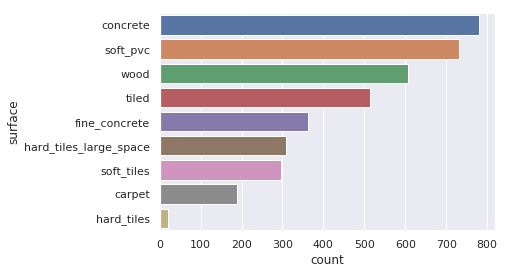

In [12]:
sns.set(style='darkgrid')
sns.countplot(y = 'surface',
              data = target,
              order = target['surface'].value_counts().index)
plt.show()

Example: Series 1
Let's have a look at the values of features in a single time-series, for example series 1  series_id=0

Click to see all measurements of the first series

In [13]:
serie1 = tr.head(128)
serie1.head()

,row_id,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
0,0_0,0,0,-0.75853,-0.63435,-0.10488,-0.10597,0.107650,0.017561,0.000767,-0.74857,2.1030,-9.7532
1,0_1,0,1,-0.75853,-0.63434,-0.10490,-0.10600,0.067851,0.029939,0.003385,0.33995,1.5064,-9.4128
2,0_2,0,2,-0.75853,-0.63435,-0.10492,-0.10597,0.007275,0.028934,-0.005978,-0.26429,1.5922,-8.7267
3,0_3,0,3,-0.75852,-0.63436,-0.10495,-0.10597,-0.013053,0.019448,-0.008974,0.42684,1.0993,-10.0960
4,0_4,0,4,-0.75852,-0.63435,-0.10495,-0.10596,0.005135,0.007652,0.005245,-0.50969,1.4689,-10.4410


In [14]:
serie1.describe()

,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
count,128.0,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,0.0,63.500000,-0.758666,-0.634008,-0.105474,-0.106470,-0.002481,-0.003306,0.007532,0.263418,2.984195,-9.320391
std,0.0,37.094474,0.000363,0.000471,0.000432,0.000389,0.052800,0.031544,0.017127,0.911175,1.387790,1.095040
min,0.0,0.000000,-0.759530,-0.634560,-0.106140,-0.107050,-0.160410,-0.079404,-0.030181,-1.864400,0.075417,-12.512000
25%,0.0,31.750000,-0.758927,-0.634383,-0.105873,-0.106775,-0.029069,-0.027110,-0.005289,-0.362872,1.791050,-9.875850
50%,0.0,63.500000,-0.758530,-0.634270,-0.105500,-0.106555,-0.005082,-0.004037,0.006842,0.231665,3.407550,-9.429950
75%,0.0,95.250000,-0.758367,-0.633530,-0.105077,-0.106130,0.035803,0.020031,0.020088,0.905635,4.119200,-8.633425
max,0.0,127.000000,-0.758220,-0.633060,-0.104610,-0.105590,0.107650,0.072698,0.051720,2.853800,5.386400,-6.268100


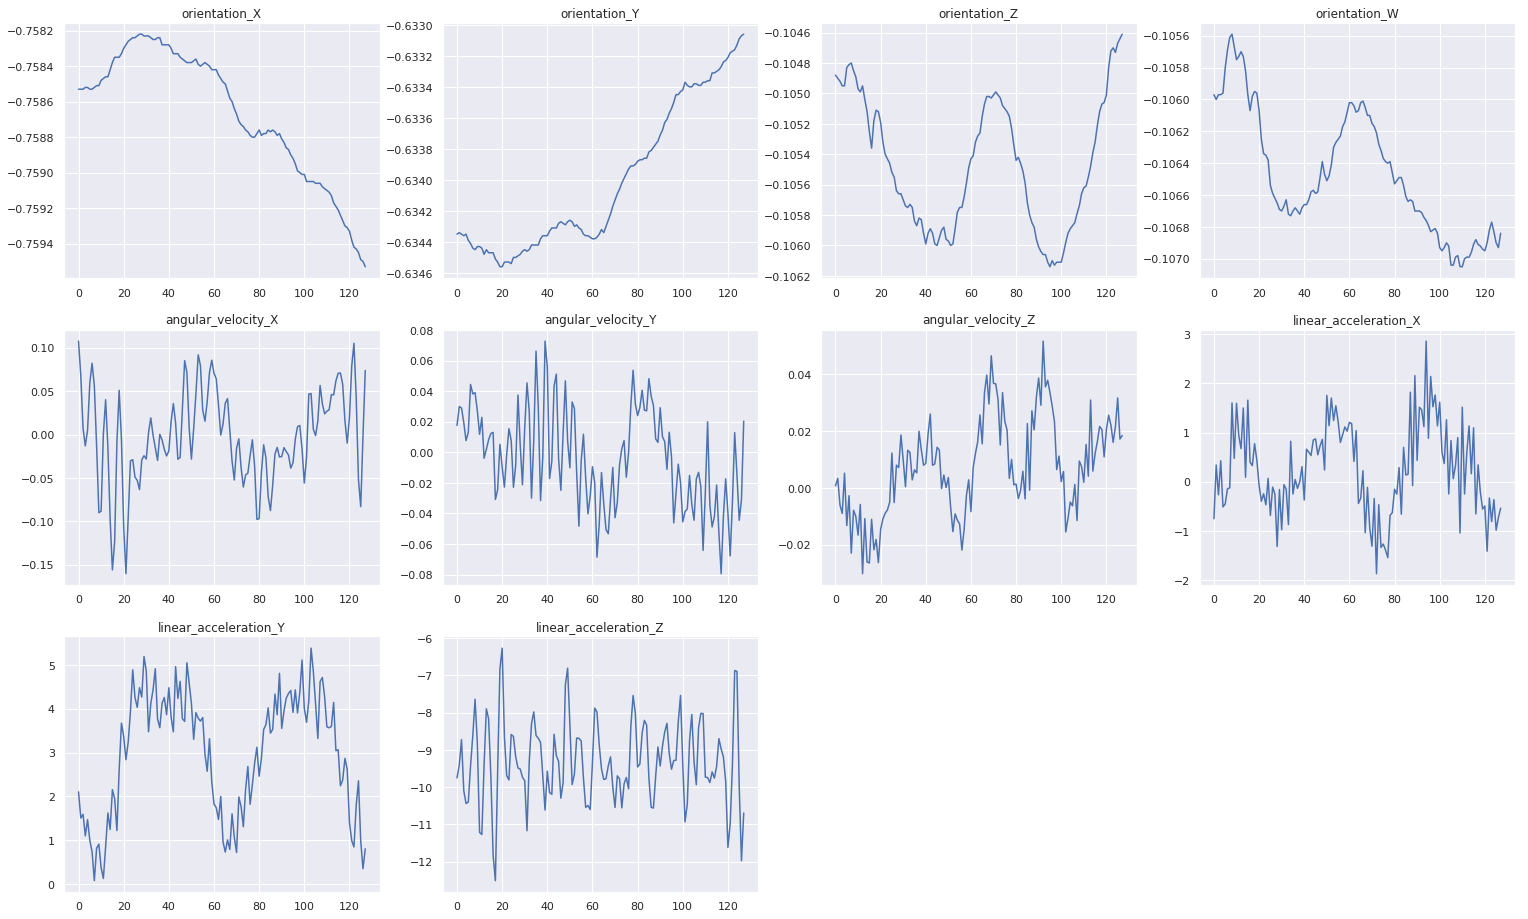

In [15]:
plt.figure(figsize=(26, 16))
for i, col in enumerate(serie1.columns[3:]):
    plt.subplot(3, 4, i + 1)
    plt.plot(serie1[col])
    plt.title(col)

In this example, we can see a quite interesting performance:

Orientation X increases
Orientation Y decreases
We don't see any kind of pattern except for linear_acceleration_Y
And we know that in this series, the robot moved throuh "fine_concrete".

Aggregate all the time series info

In [16]:
series_dict = {}
for series in (data['series_id'].unique()):
    series_dict[series] = data[data['series_id'] == series]  

In [17]:
def plotSeries(series_id):
    style.use('ggplot')
    plt.figure(figsize=(28, 16))
    print(target[target['series_id'] == series_id]['surface'].values[0].title())
    for i, col in enumerate(series_dict[series_id].columns[3:]):
        if col.startswith("o"):
            color = 'red'
        elif col.startswith("a"):
            color = 'green'
        else:
            color = 'blue'
        if i >= 7:
            i+=1
        plt.subplot(3, 4, i + 1)
        plt.plot(series_dict[series_id][col], color=color, linewidth=3)
        plt.title(col)

Soft_Tiles


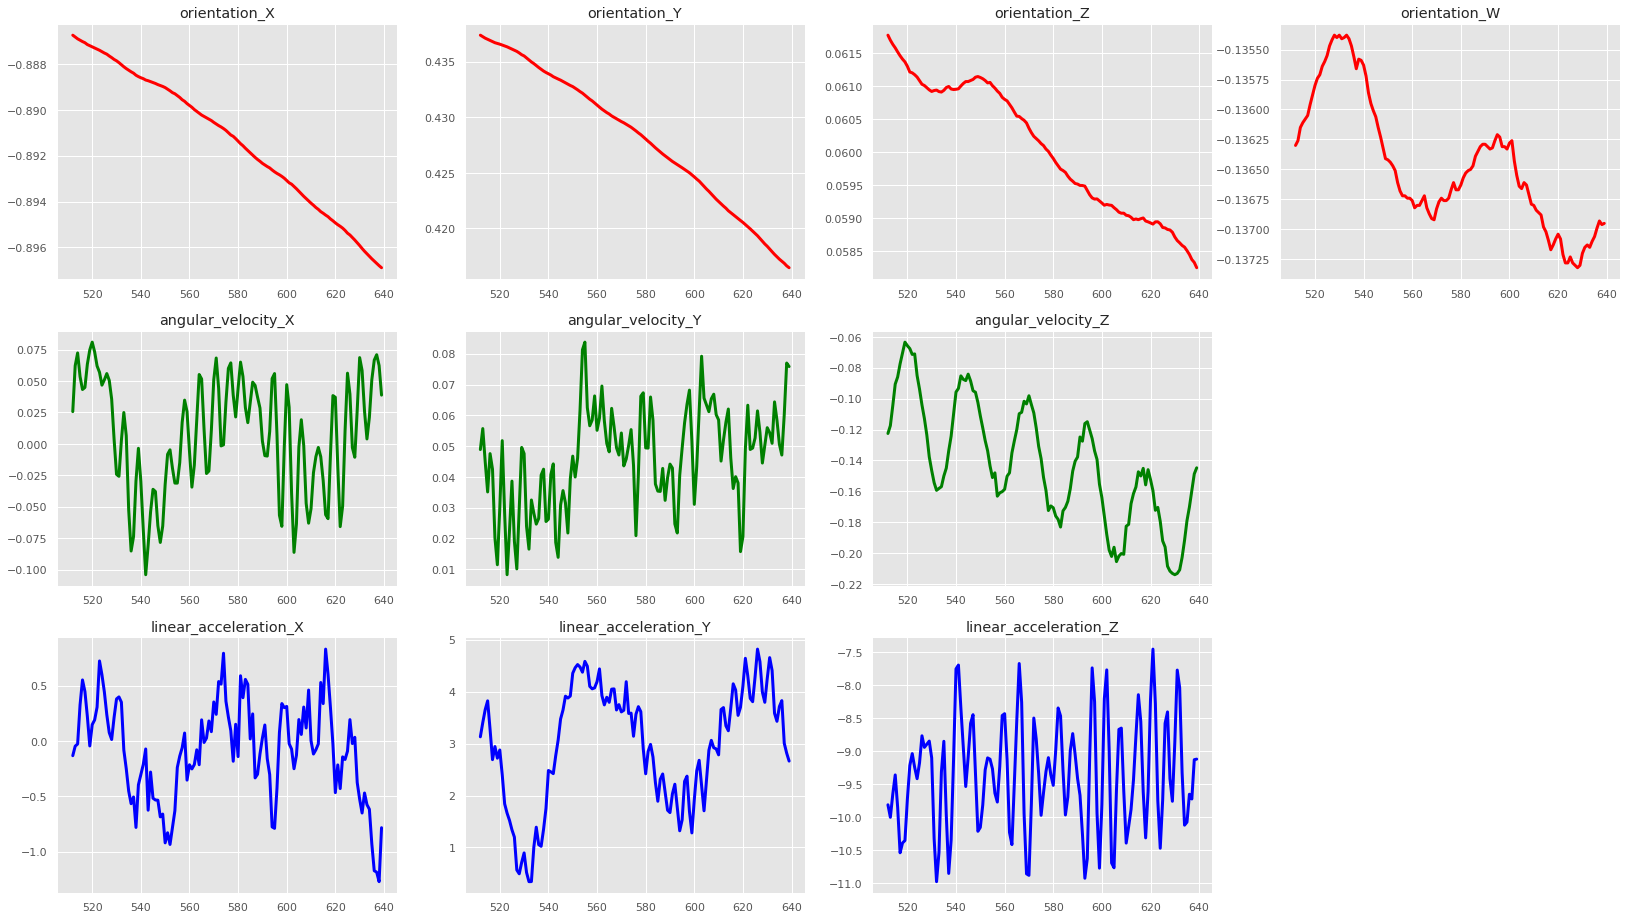

In [18]:
id_series = 4
plotSeries(id_series)

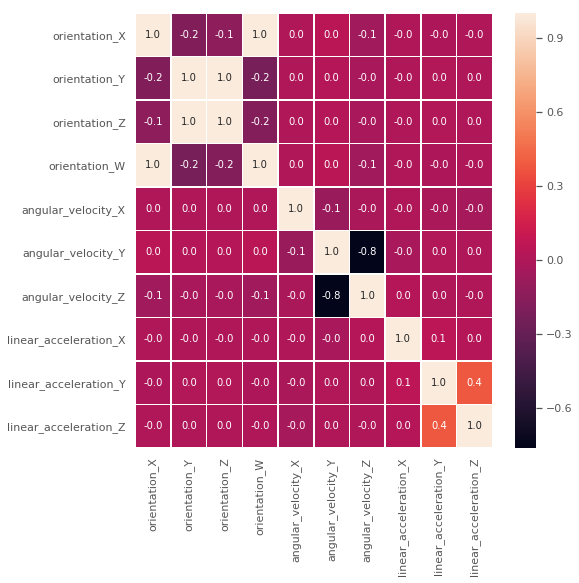

In [19]:
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(tr.iloc[:,3:].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

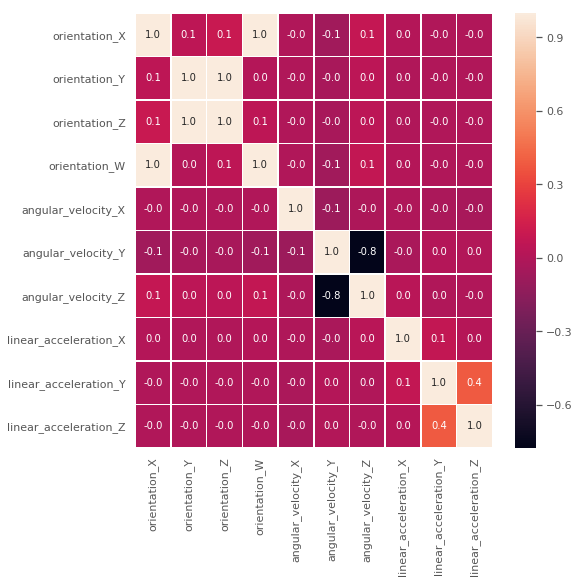

In [20]:
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(test.iloc[:,3:].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

Well, this is immportant, there is a strong correlation between:


angular_velocity_Z and angular_velocity_Y

orientation_X and orientation_Y


orientation_Y and orientation_Z


Moreover, test has different correlations than training, for example:

angular_velocity_Z and orientation_X: -0.1(training) and 0.1(test). 

Anyway, is too small in both cases, it should not be a problem.

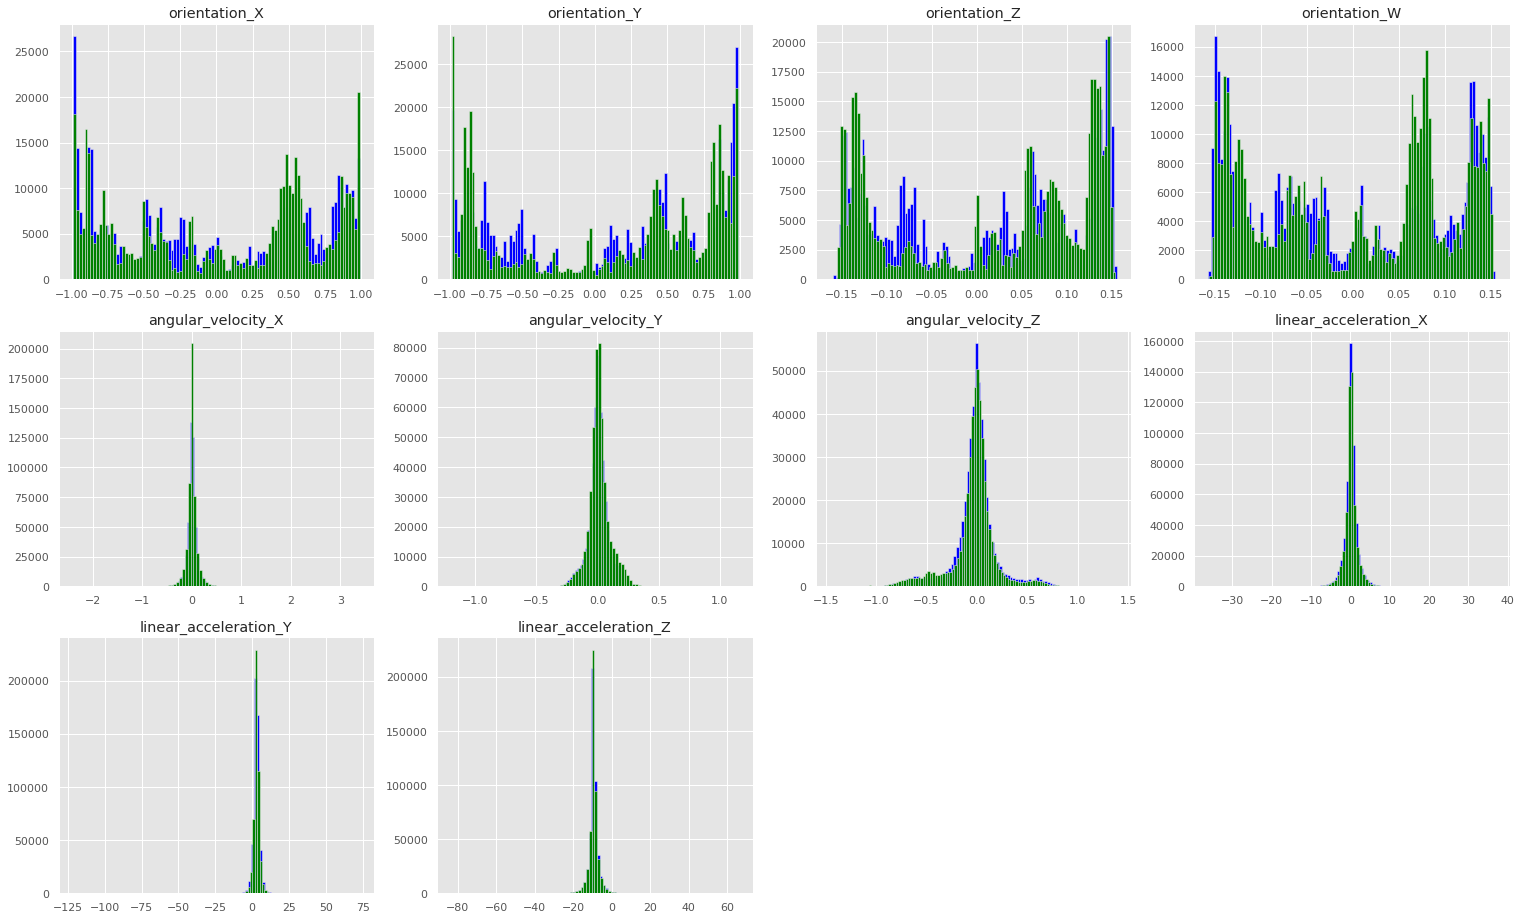

In [21]:
plt.figure(figsize=(26, 16))
for i, col in enumerate(tr.columns[3:]):
    plt.subplot(3, 4, i + 1)
    plt.hist(tr[col], color='blue', bins=100)
    plt.hist(test[col], color='green', bins=100)
    plt.title(col)

Feature generation

We have 128 measurements in each series, so it makes sense to create aggregate features. I create several groups of them:

Usual aggregations: mean, std, min and max, absolute min and max. Max to min rate;

Mean change rate in absolute and relative values - it shows how fast values change;

Quantiles - showing extreme values;

Trend features - to show whether values decrease or increase;

Rolling features - to show mean/std values with windows;

Various statistical features from LANL competition;

Descriptions will be done later. I use ideas from my kernel for another competition: https://www.kaggle.com/artgor/earthquakes-fe-more-features-and-samples

In [22]:
train_df = tr[['series_id']].drop_duplicates().reset_index(drop=True)

In [ ]:
for col in tr.columns:
    if 'orient' in col:
        scaler = StandardScaler()
        tr[col] = scaler.fit_transform(tr[col].values.reshape(-1, 1))
        test[col] = scaler.transform(test[col].values.reshape(-1, 1))

In [23]:
from tqdm import tqdm_notebook
from sklearn.linear_model import LinearRegression

def calc_change_rate(x):
    change = (np.diff(x) / x[:-1]).values
    change = change[np.nonzero(change)[0]]
    change = change[~np.isnan(change)]
    change = change[change != -np.inf]
    change = change[change != np.inf]
    return np.mean(change)

def add_trend_feature(arr, abs_values=False):
    idx = np.array(range(len(arr)))
    if abs_values:
        arr = np.abs(arr)
    lr = LinearRegression()
    lr.fit(idx.reshape(-1, 1), arr)
    return lr.coef_[0]

def classic_sta_lta(x, length_sta, length_lta):
    
    sta = np.cumsum(x ** 2)

    # Convert to float
    sta = np.require(sta, dtype=np.float)

    # Copy for LTA
    lta = sta.copy()

    # Compute the STA and the LTA
    sta[length_sta:] = sta[length_sta:] - sta[:-length_sta]
    sta /= length_sta
    lta[length_lta:] = lta[length_lta:] - lta[:-length_lta]
    lta /= length_lta

    # Pad zeros
    sta[:length_lta - 1] = 0

    # Avoid division by zero by setting zero values to tiny float
    dtiny = np.finfo(0.0).tiny
    idx = lta < dtiny
    lta[idx] = dtiny

    return sta / lta

for col in tqdm_notebook(tr.columns[3:]):
    train_df[col + '_mean'] = tr.groupby(['series_id'])[col].mean()
    train_df[col + '_std'] = tr.groupby(['series_id'])[col].std()
    train_df[col + '_max'] = tr.groupby(['series_id'])[col].max()
    train_df[col + '_min'] = tr.groupby(['series_id'])[col].min()
    train_df[col + '_max_to_min'] = train_df[col + '_max'] / train_df[col + '_min']

    for i in train_df['series_id']:
        train_df.loc[i, col + '_mean_change_abs'] = np.mean(np.diff(tr.loc[tr['series_id'] == i, col]))
        train_df.loc[i, col + '_mean_change_rate'] = calc_change_rate(tr.loc[tr['series_id'] == i, col])
        
        train_df.loc[i, col + '_q95'] = np.quantile(tr.loc[tr['series_id'] == i, col], 0.95)
        train_df.loc[i, col + '_q99'] = np.quantile(tr.loc[tr['series_id'] == i, col], 0.99)
        train_df.loc[i, col + '_q05'] = np.quantile(tr.loc[tr['series_id'] == i, col], 0.05)
        
        train_df.loc[i, col + '_abs_min'] = np.abs(tr.loc[tr['series_id'] == i, col]).min()
        train_df.loc[i, col + '_abs_max'] = np.abs(tr.loc[tr['series_id'] == i, col]).max()
        
        train_df.loc[i, col + '_trend'] = add_trend_feature(tr.loc[tr['series_id'] == i, col].values)
        train_df.loc[i, col + '_abs_trend'] = add_trend_feature(tr.loc[tr['series_id'] == i, col].values, abs_values=True)
        train_df.loc[i, col + '_abs_mean'] = np.abs(tr.loc[tr['series_id'] == i, col]).mean()
        train_df.loc[i, col + '_abs_std'] = np.abs(tr.loc[tr['series_id'] == i, col]).std()
        
        train_df.loc[i, col + '_mad'] = tr.loc[tr['series_id'] == i, col].mad()
        train_df.loc[i, col + '_kurt'] = tr.loc[tr['series_id'] == i, col].kurtosis()
        train_df.loc[i, col + '_skew'] = tr.loc[tr['series_id'] == i, col].skew()
        train_df.loc[i, col + '_med'] = tr.loc[tr['series_id'] == i, col].median()
        
        train_df.loc[i, col + 'iqr'] = np.subtract(*np.percentile(tr.loc[tr['series_id'] == i, col], [75, 25]))
        train_df.loc[i, col + 'ave10'] = stats.trim_mean(tr.loc[tr['series_id'] == i, col], 0.1)

In [24]:
test_df = sub[['series_id']]
for col in tqdm_notebook(test.columns[3:]):
    test_df[col + '_mean'] = test.groupby(['series_id'])[col].mean()
    test_df[col + '_std'] = test.groupby(['series_id'])[col].std()
    test_df[col + '_max'] = test.groupby(['series_id'])[col].max()
    test_df[col + '_min'] = test.groupby(['series_id'])[col].min()
    test_df[col + '_max_to_min'] = test_df[col + '_max'] / test_df[col + '_min']

    for i in test_df['series_id']:
        test_df.loc[i, col + '_mean_change_abs'] = np.mean(np.diff(test.loc[test['series_id'] == i, col]))
        test_df.loc[i, col + '_mean_change_rate'] = calc_change_rate(test.loc[test['series_id'] == i, col])
        
        test_df.loc[i, col + '_q95'] = np.quantile(test.loc[test['series_id'] == i, col], 0.95)
        test_df.loc[i, col + '_q99'] = np.quantile(test.loc[test['series_id'] == i, col], 0.99)
        test_df.loc[i, col + '_q05'] = np.quantile(test.loc[test['series_id'] == i, col], 0.05)
        
        test_df.loc[i, col + '_abs_min'] = np.abs(test.loc[test['series_id'] == i, col]).min()
        test_df.loc[i, col + '_abs_max'] = np.abs(test.loc[test['series_id'] == i, col]).max()
        
        test_df.loc[i, col + '_trend'] = add_trend_feature(test.loc[test['series_id'] == i, col].values)
        test_df.loc[i, col + '_abs_trend'] = add_trend_feature(test.loc[test['series_id'] == i, col].values, abs_values=True)
        test_df.loc[i, col + '_abs_mean'] = np.abs(test.loc[test['series_id'] == i, col]).mean()
        test_df.loc[i, col + '_abs_std'] = np.abs(test.loc[test['series_id'] == i, col]).std()
        
        test_df.loc[i, col + '_mad'] = test.loc[test['series_id'] == i, col].mad()
        test_df.loc[i, col + '_kurt'] = test.loc[test['series_id'] == i, col].kurtosis()
        test_df.loc[i, col + '_skew'] = test.loc[test['series_id'] == i, col].skew()
        test_df.loc[i, col + '_med'] = test.loc[test['series_id'] == i, col].median()
        
        test_df.loc[i, col + 'iqr'] = np.subtract(*np.percentile(test.loc[test['series_id'] == i, col], [75, 25]))
        test_df.loc[i, col + 'ave10'] = stats.trim_mean(test.loc[test['series_id'] == i, col], 0.1)

In [25]:
train_df.head()

,series_id,orientation_X_mean,orientation_X_std,orientation_X_max,orientation_X_min,orientation_X_max_to_min,orientation_X_mean_change_abs,orientation_X_mean_change_rate,orientation_X_q95,orientation_X_q99,orientation_X_q05,orientation_X_abs_min,orientation_X_abs_max,orientation_X_trend,orientation_X_abs_trend,orientation_X_abs_mean,orientation_X_abs_std,orientation_X_mad,orientation_X_kurt,orientation_X_skew,orientation_X_med,orientation_Xiqr,orientation_Xave10,orientation_Y_mean,orientation_Y_std,orientation_Y_max,orientation_Y_min,orientation_Y_max_to_min,orientation_Y_mean_change_abs,orientation_Y_mean_change_rate,orientation_Y_q95,orientation_Y_q99,orientation_Y_q05,orientation_Y_abs_min,orientation_Y_abs_max,orientation_Y_trend,orientation_Y_abs_trend,orientation_Y_abs_mean,orientation_Y_abs_std,orientation_Y_mad,...,linear_acceleration_Y_max_to_min,linear_acceleration_Y_mean_change_abs,linear_acceleration_Y_mean_change_rate,linear_acceleration_Y_q95,linear_acceleration_Y_q99,linear_acceleration_Y_q05,linear_acceleration_Y_abs_min,linear_acceleration_Y_abs_max,linear_acceleration_Y_trend,linear_acceleration_Y_abs_trend,linear_acceleration_Y_abs_mean,linear_acceleration_Y_abs_std,linear_acceleration_Y_mad,linear_acceleration_Y_kurt,linear_acceleration_Y_skew,linear_acceleration_Y_med,linear_acceleration_Yiqr,linear_acceleration_Yave10,linear_acceleration_Z_mean,linear_acceleration_Z_std,linear_acceleration_Z_max,linear_acceleration_Z_min,linear_acceleration_Z_max_to_min,linear_acceleration_Z_mean_change_abs,linear_acceleration_Z_mean_change_rate,linear_acceleration_Z_q95,linear_acceleration_Z_q99,linear_acceleration_Z_q05,linear_acceleration_Z_abs_min,linear_acceleration_Z_abs_max,linear_acceleration_Z_trend,linear_acceleration_Z_abs_trend,linear_acceleration_Z_abs_mean,linear_acceleration_Z_abs_std,linear_acceleration_Z_mad,linear_acceleration_Z_kurt,linear_acceleration_Z_skew,linear_acceleration_Z_med,linear_acceleration_Ziqr,linear_acceleration_Zave10
0,0,-0.758666,0.000363,-0.75822,-0.75953,0.998275,-0.000008,0.000014,-0.758240,-0.758223,-0.759363,0.75822,0.75953,-0.000009,0.000009,0.758666,0.000363,0.000311,-0.646196,-0.659082,-0.758530,0.000560,-0.758632,-0.634008,0.000471,-0.63306,-0.63456,0.997636,0.000010,-0.000020,-0.633190,-0.633075,-0.634523,0.63306,0.63456,0.000012,-0.000012,0.634008,0.000471,0.000421,...,71.421563,-0.010233,0.146498,4.879460,5.172865,0.753999,0.075417,5.3864,0.005389,0.005389,2.984195,1.387790,1.208156,-1.075352,-0.364964,3.40755,2.328150,3.032518,-9.320391,1.095040,-6.2681,-12.512,0.500967,-0.007431,0.007768,-7.538790,-6.814420,-11.10455,6.2681,12.512,0.000276,-0.000276,9.320391,1.095040,0.839636,0.532135,0.067391,-9.42995,1.242425,-9.328722
1,1,-0.958606,0.000151,-0.95837,-0.95896,0.999385,0.000003,-0.000003,-0.958390,-0.958380,-0.958880,0.95837,0.95896,0.000003,-0.000003,0.958606,0.000151,0.000126,-0.642996,-0.397289,-0.958595,0.000240,-0.958598,0.241867,0.000499,0.24270,0.24074,1.008142,0.000012,0.000053,0.242563,0.242695,0.240958,0.24074,0.24270,0.000011,0.000011,0.241867,0.000499,0.000401,...,-3.110460,-0.001414,-2.846141,5.469235,6.523244,-0.215299,0.002069,6.6850,0.011755,0.008510,2.873462,1.696358,1.531096,-0.575238,-0.183139,2.75010,2.947500,2.812511,-9.388899,2.123065,-2.7449,-16.928,0.162151,-0.005932,0.033385,-5.726810,-4.850184,-12.37800,2.7449,16.928,0.001406,-0.001406,9.388899,2.123065,1.562716,1.356800,-0.126848,-9.41380,2.256825,-9.404213
2,2,-0.512057,0.001377,-0.50944,-0.51434,0.990473,-0.000039,0.000083,-0.509841,-0.509506,-0.514065,0.50944,0.51434,-0.000037,0.000037,0.512057,0.001377,0.001144,-1.052580,0.151971,-0.512035,0.002162,-0.512087,-0.846171,0.000785,-0.84490,-0.84779,0.996591,0.000023,-0.000029,-0.845031,-0.844915,-0.847460,0.84490,0.84779,0.000021,-0.000021,0.846171,0.000785,0.000673,...,-4.952552,-0.004521,-0.715923,5.497945,6.020248,-0.163315,0.017946,6.2105,-0.005427,-0.005887,2.951067,1.659430,1.396668,-0.584675,-0.266815,3.03375,2.222125,2.938097,-9.39578

In [26]:
from sklearn.model_selection import StratifiedKFold, KFold, RepeatedKFold, train_test_split, GroupKFold, GroupShuffleSplit
n_fold = 2
folds = GroupShuffleSplit(n_splits=n_fold, test_size=0.2, random_state=11)

In [27]:
le = LabelEncoder()
le.fit(target['surface'])
target['surface'] = le.transform(target['surface'])

train_df = train_df.drop(['series_id'], axis=1)
test_df = test_df.drop(['series_id'], axis=1)

In [40]:
import lightgbm as lgb
import xgboost as xgb

def eval_acc(preds, dtrain):
    labels = dtrain.get_label()
    return 'acc', accuracy_score(labels, preds.argmax(1)), True

def train_model(X, X_test, y, params=None, folds=folds, model_type='lgb', plot_feature_importance=False, model=None, groups=target['group_id']):

    oof = np.zeros((len(X), 9))
    prediction = np.zeros((len(X_test), 9))
    scores = []
    feature_importance = pd.DataFrame()
    for fold_n, (train_index, valid_index) in enumerate(folds.split(X, y, groups)):
        print('Fold', fold_n)
        X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
        y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
        
        if model_type == 'lgb':
            model = lgb.LGBMClassifier(**params, n_estimators = 10000, n_jobs = -1)
            model.fit(X_train, y_train, 
                    eval_set=[(X_train, y_train), (X_valid, y_valid)], eval_metric='multi_logloss',
                    verbose=5000, early_stopping_rounds=200)
            
            y_pred_valid = model.predict_proba(X_valid)
            y_pred = model.predict_proba(X_test, num_iteration=model.best_iteration_)
            
        if model_type == 'xgb':
            train_data = xgb.DMatrix(data=X_train, label=y_train, feature_names=X.columns)
            valid_data = xgb.DMatrix(data=X_valid, label=y_valid, feature_names=X.columns)

            watchlist = [(train_data, 'train'), (valid_data, 'valid_data')]
            model = xgb.train(dtrain=train_data, num_boost_round=20000, evals=watchlist, early_stopping_rounds=200, verbose_eval=500, params=params)
            y_pred_valid = model.predict(xgb.DMatrix(X_valid, feature_names=X.columns), ntree_limit=model.best_ntree_limit)
            y_pred = model.predict(xgb.DMatrix(X_test, feature_names=X.columns), ntree_limit=model.best_ntree_limit)
        
        if model_type == 'sklearn':
            model = model
            model.fit(X_train, y_train)
            
            y_pred_valid = model.predict_proba(X_valid)
            score = accuracy_score(y_valid, y_pred_valid.argmax(1))
            print(f'Fold {fold_n}. Accuracy: {score:.4f}.')
            print('')
            
            y_pred = model.predict_proba(X_test)
        
        if model_type == 'cat':
            model = CatBoostClassifier(iterations=20000,  eval_metric='MAE', **params)
            model.fit(X_train, y_train, eval_set=(X_valid, y_valid), cat_features=[], use_best_model=True, verbose=False)

            y_pred_valid = model.predict(X_valid)
            y_pred = model.predict(X_test)
        
        oof[valid_index] = y_pred_valid
        scores.append(accuracy_score(y_valid, y_pred_valid.argmax(1)))

        prediction += y_pred    
        
        if model_type == 'lgb':
            # feature importance
            fold_importance = pd.DataFrame()
            fold_importance["feature"] = X.columns
            fold_importance["importance"] = model.feature_importances_
            fold_importance["fold"] = fold_n + 1
            feature_importance = pd.concat([feature_importance, fold_importance], axis=0)

    prediction /= n_fold
    
    print('CV mean score: {0:.4f}, std: {1:.4f}.'.format(np.mean(scores), np.std(scores)))
    
    if model_type == 'lgb':
        feature_importance["importance"] /= n_fold
        if plot_feature_importance:
            cols = feature_importance[["feature", "importance"]].groupby("feature").mean().sort_values(
                by="importance", ascending=False)[:50].index

            best_features = feature_importance.loc[feature_importance.feature.isin(cols)]

            plt.figure(figsize=(16, 12));
            sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False));
            plt.title('LGB Features (avg over folds)');
        
            return oof, prediction, feature_importance
        return oof, prediction
    
    else:
        return oof, prediction

In [ ]:
params = {'num_leaves': 123,
          'min_data_in_leaf': 12,
          'objective': 'multiclass',
          'max_depth': 22,
          'learning_rate': 0.04680350949723872,
          "boosting": "gbdt",
          "bagging_freq": 5,
          "bagging_fraction": 0.8933018355190274,
          "bagging_seed": 11,
          "verbosity": -1,
          'reg_alpha': 0.9498109326932401,
          'reg_lambda': 0.8058490960546196,
          "num_class": 9,
          'nthread': -1,
          'min_split_gain': 0.009913227240564853,
          'subsample': 0.9027358830703129
         }

#import sklearn.ensemble
#model = RandomForestClassifier(n_estimators=100)
oof_lgb, prediction_lgb, feature_importance = train_model(X=train_df, X_test=test_df, y=target['surface'], params=params, model_type='lgb', model=model, plot_feature_importance=True)

Fold 0
Training until validation scores don't improve for 200 rounds.


In [37]:
# I use code from this kernel: https://www.kaggle.com/theoviel/deep-learning-starter
import itertools

def plot_confusion_matrix(truth, pred, classes, normalize=False, title=''):
    cm = confusion_matrix(truth, pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    plt.figure(figsize=(10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion matrix', size=15)
    plt.colorbar(fraction=0.046, pad=0.04)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.grid(False)
    plt.tight_layout()

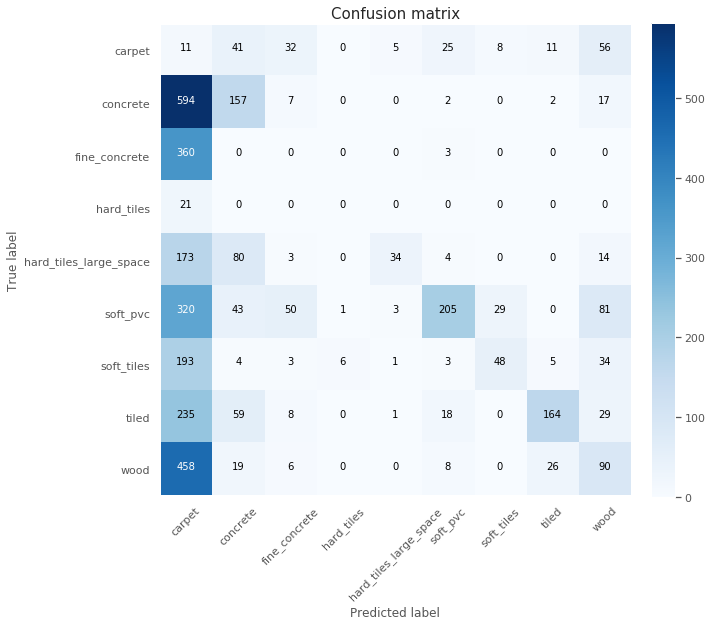

In [39]:
plot_confusion_matrix(target['surface'], oof_lgb.argmax(1), le.classes_)

Bibliography

[1] https://www.kaggle.com/jesucristo/1-smart-robots-most-complete-notebook

[2] https://www.kaggle.com/artgor/where-do-the-robots-drive